In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
import emoji
from IPython.display import HTML
import warnings
warnings.filterwarnings('ignore')
!pip install colour

In [7]:
from google.colab import files
df = files.upload()

Saving datasets_494724_1196190_time_series_covid_19_confirmed.csv to datasets_494724_1196190_time_series_covid_19_confirmed.csv


In [0]:
df = pd.read_csv(io.BytesIO(df['datasets_494724_1196190_time_series_covid_19_confirmed.csv']))

In [14]:
df

,Province/State,Country/Region,Lat,Long,01/22/2020,01/23/2020,01/24/2020,01/25/2020,01/26/2020,01/27/2020,01/28/2020,01/29/2020,01/30/2020,01/31/2020,02/01/2020,02/02/2020,02/03/2020,02/04/2020,02/05/2020,02/06/2020,02/07/2020,02/08/2020,02/09/2020,02/10/2020,02/11/2020,02/12/2020,02/13/2020,02/14/2020,02/15/2020,02/16/2020,02/17/2020,02/18/2020,02/19/2020,02/20/2020,02/21/2020,02/22/2020,02/23/2020,02/24/2020,02/25/2020,02/26/2020,...,04/19/2020,04/20/2020,04/21/2020,04/22/2020,04/23/2020,04/24/2020,04/25/2020,04/26/2020,04/27/2020,04/28/2020,04/29/2020,04/30/2020,05/01/2020,05/02/2020,05/03/2020,05/04/2020,05/05/2020,05/06/2020,05/07/2020,05/08/2020,05/09/2020,05/10/2020,05/11/2020,05/12/2020,05/13/2020,05/14/2020,05/15/2020,05/16/2020,05/17/2020,05/18/2020,05/19/2020,05/20/2020,05/21/2020,05/22/2020,05/23/2020,05/24/2020,05/25/2020,05/26/2020,05/27/2020,05/28/2020
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,...,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456,13036
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876,880,898,916,933,946,948,949,964,969,981,989,998,1004,1029,1050,1076
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857,8997
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758,760,761,761,761,761,761,761,762,762,762,762,762,763,763,763,763
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45,45,48,48,48,48,50,52,52,58,60,61,69,70,70,71,74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,8,8,14,16,16,16,23,174,174,187,208,208,208,208,208,220,235,235,235,235,246,251,251,251,251,251,251,299,441,443,458
262,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1,6,6,7,10,10,12,22,25,25,34,34,51,56,65,70,85,106,122,128,130,167,184,197,209,212,222,233,249,256,278
263,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,1,1,3,3,3,3,8,8,8,11,11,11,11,11,11,11,11,11,11,11,34,34,78,78,87,87,87,87,87
264,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,15,15,76,128,230,293,379,461,522,612,612,661,729,801,907,1118,1322,1524,1729,1936,2140,2350,2551,2738,2929,3100,3266,3424,3563


In [0]:
dates = df.columns[4:]


In [20]:
dates

Index(['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020',
       '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020',
       ...
       '05/19/2020', '05/20/2020', '05/21/2020', '05/22/2020', '05/23/2020',
       '05/24/2020', '05/25/2020', '05/26/2020', '05/27/2020', '05/28/2020'],
      dtype='object', length=128)

In [0]:
confirmed = df.melt(id_vars=['Province/State', 'Country/Region', 'Lat', 'Long'], 
                            value_vars=dates, var_name='Date', value_name='Confirmed')

In [0]:
adj_dates = confirmed .Date.unique()


In [0]:
def genratepseudorandomcolors():
    import random
    from colour import Color
    random_i = random.randint(0,10000000)
    random_j = random.randint(0,10000000)
    c = Color(random_i,random_j)
    hex_number = c.hex_l
    return hex_number

In [0]:
colours = []
for i in range(len(confirmed['Country/Region'].unique())) :
    colours.append(genratepseudorandomcolors())

In [0]:
colorsset = dict(zip(
    [i for i in df['Country/Region'].unique()],
    colours
))

In [0]:
start_date ='1/22/20'
current_date = start_date

In [0]:
def draw_barchart_conf(current_date):
    
    #creating dataframe for plotting 
    #In each loop it contains top 10 coutires having most number of confirmed cases
    dff = confirmed[confirmed['Date'].eq(current_date)].groupby('Country/Region').sum().sort_values(by='Confirmed', ascending=False).head(10)
    dff = dff.reset_index()
    dff = dff[::-1]
    ax.clear()
    ax.barh(dff['Country/Region'], dff['Confirmed'], color=[colorsset[x] for x in dff['Country/Region']])
    dx = dff['Confirmed'].max() / 200
    for i, (value, name) in enumerate(zip(dff['Confirmed'], dff['Country/Region'])):
        
        ax.text(value-dx, i,     name,           size=14, weight=600, ha='right', va='bottom')
        ax.text(value+dx, i,     f'{value:,.0f}',  size=14, ha='left',  va='center')
    
    
    ax.text(1, 0.4, current_date, transform=ax.transAxes, color='#777777', size=46, ha='right', weight=800)
    ax.text(0, 1.06, 'Population', transform=ax.transAxes, size=12, color='#777777')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    ax.xaxis.set_ticks_position('top')
    ax.tick_params(axis='x', colors='#777777', labelsize=12)
    ax.set_yticks([])
    ax.margins(0, 0.01)
    ax.grid(which='major', axis='x', linestyle='-')
    ax.set_axisbelow(True)
    
    #adding other textual infomations
    ax.text(0, 1.15, f'CORONA confirmed cases in the world',
            transform=ax.transAxes, size=24, weight=600, ha='left', va='top')
    ax.text(1, 0, 'by @Thiru', transform=ax.transAxes, color='#777777', ha='right',
          bbox=dict(facecolor='white', alpha=0.8, edgecolor='white'))
    #plt.box(False)
    
#draw_barchart_conf(current_date=start_date)
    

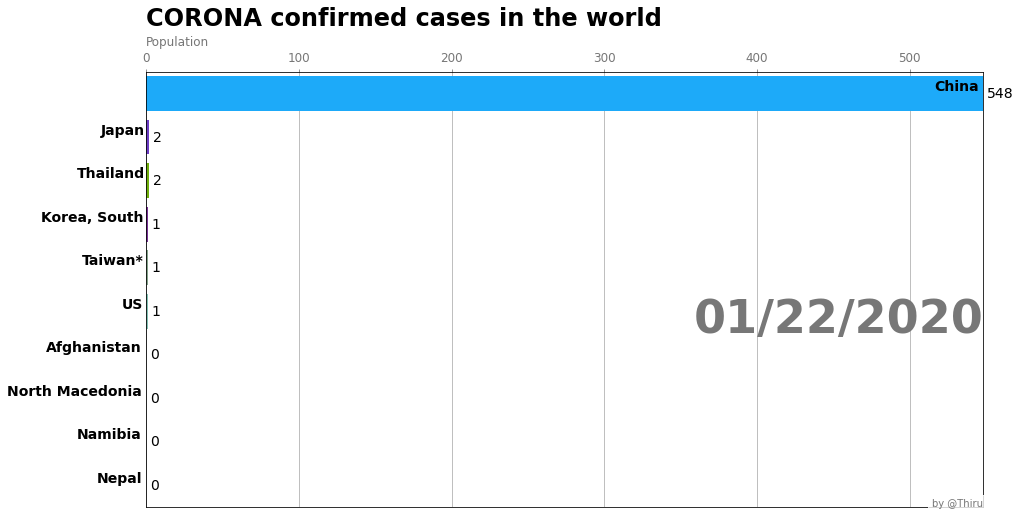

In [102]:
fig, ax = plt.subplots(figsize=(15, 8))
animator = animation.FuncAnimation(fig, draw_barchart_conf, frames=adj_dates)
HTML(animator.to_html5_video())


In [88]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [93]:
sav = HTML(animator.to_html5_video())

files.download("sav")

FileNotFoundError: ignored